In [2]:
# imports
import numpy as np
import pandas as pd
import random
import os
import re
import ast
import pickle
import matplotlib.pyplot as plt

# Action Selection
This notebook generates a graph from 3 runs that highlights how differently the algorithms select the actions.

In [10]:
results="results/"
# read results
run_folders = [results+s for s in os.listdir(results) if s.startswith("2022")]
run_folders.sort(key=lambda f: int(re.findall(r"[\d]+\Z", f)[0]))

params = []
episode_scores = []
non_greedy_fractions = []
for run_folder in run_folders:
    with open(run_folder+"/experimental-setup", "r") as setup:
        setup_dict = ast.literal_eval(setup.read())
        setup_dict["agent"] = "UADQN" if re.search(r"UADQN", run_folder) else "DQN"
        params.append(setup_dict)
    try:
        with open(run_folder+"/log_data.pkl", "rb") as scores:
            f = pickle.load(scores)
            episode_scores.append([score for score, ts in f["Episode_score"]])
            non_greedy_fractions.append([ngf for ngf, ts in f["Non Greedy Fraction"]])
    except (FileNotFoundError):
        episode_scores.append("")

In [12]:
setups = pd.DataFrame(params)
scores = pd.DataFrame(episode_scores)
ngfs = pd.DataFrame(non_greedy_fractions)

In [13]:
ngfs

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.072269,0.018952,0.017354,0.016897,0.018838,0.018724,0.021235,0.015527,0.018153,0.017239,...,0.015527,0.018267,0.018153,0.016669,0.017354,0.018381,0.017582,0.015070,0.017810,0.017239
1,0.317730,0.342962,0.264985,0.217491,0.164859,0.134376,0.121247,0.102409,0.085512,0.084599,...,0.029912,0.031625,0.031853,0.030483,0.029798,0.023861,0.029455,0.028770,0.028085,0.027629
2,0.365224,0.268866,0.223313,0.204704,0.177418,0.172166,0.160863,0.173536,0.157552,0.141112,...,0.052632,0.047152,0.050234,0.045667,0.043156,0.046466,0.047837,0.044411,0.043156,0.044526


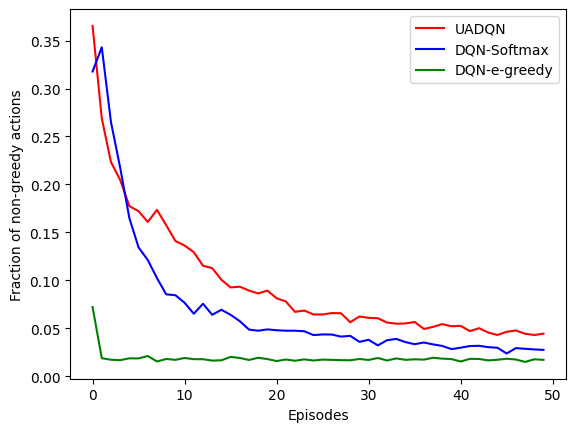

In [25]:

plt.plot(ngfs.transpose()[2], label= "UADQN", color="red")
plt.plot(ngfs.transpose()[1], label= "DQN-Softmax", color="blue")
plt.plot(ngfs.transpose()[0], label = "DQN-e-greedy", color="green")
plt.xlabel("Episodes")
plt.ylabel("Fraction of non-greedy actions")
plt.legend()
plt.savefig("non-greedy-fraction.png")
plt.show()

In [36]:
setups[setups.columns.drop(["Notes", "env", "network", "seed", "weight_scale"])].transpose()

,0,1,2
action_selection,egreedy,softmax,NaN
adam_epsilon,0.0,0.00001,0.0
final_exploration_rate,0.02,0.02,NaN
final_exploration_step,1000.0,1000.0,NaN
gamma,0.99,0.99,0.99
initial_exploration_rate,1.0,1.0,NaN
learning_rate,0.00007,0.0003,0.0003
loss,mse,mse,NaN
minibatch_size,4,128,128
replay_buffer_size,10000,10000,10000
